In [104]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(rc={'figure.figsize': (9, 6)})

In [78]:
class GDRegressor_mode(BaseEstimator):

    def __init__(self, eta=10**-3, n_iter=10, quiet=False):
        self.mse_ = []
        self.weights_ = []
        self.params = {}
        self.params['eta'] = eta
        self.params['n_iter'] = n_iter
        self.params['quiet'] = quiet
        super(GDRegressor_mode, self).set_params(**self.params)
    
    def fit(self, X, y):
        self.w = [0] * (len(X[0]) + 1)
        
        for epoch in range(self.params['n_iter']):
            derivative_w0 = 0
            derivative_wn = [0] * len(X[0])

            for i in range(len(y)):
                y_pred = self.predict([X[i]])[0]
                error = y_pred - y[i]
                derivative_w0 += error
                for j in range(len(X[i])):
                    derivative_wn[j] += error * X[i][j]
                
            self.w[0] = self.w[0] - self.params['eta'] * derivative_w0 / len(y)
            for j in range(len(X[i])):
                self.w[j+1] = self.w[j+1] - self.params['eta'] * derivative_wn[j] / len(y)
            mse = mean_squared_error(y, self.predict(X))

            self.mse_.append(mse)
            self.weights_.append(self.w.copy())
    
            if not self.params['quiet']:
                out = f'>epoch={epoch}, mse={mse:.6f}'
                for i in range(len(self.w)):
                    out += f', w{i}={self.w[i]:.6f}'
                print(out)
                  
        return self

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            pred = self.w[0]
            for j in range(len(X[i])):
                pred += self.w[j+1]*X[i][j]
            y_pred.append(pred)
        return y_pred

In [101]:
gd = GDRegressor_mode(n_iter=20, eta=10**-1)

# XOR dataset
X = np.array([
    [0, 1],
    [1, 0],
    [1, 1],
    [0, 0]
])
y = np.array([1, 1, 0, 0])

gd.fit(X, y)

>epoch=0, mse=0.430938, w0=0.050000, w1=0.025000, w2=0.025000
>epoch=1, mse=0.381994, w0=0.092500, w1=0.045625, w2=0.045625
>epoch=2, mse=0.347275, w0=0.128688, w1=0.062578, w2=0.062578
>epoch=3, mse=0.322612, w0=0.159561, w1=0.076450, w2=0.076450
>epoch=4, mse=0.305061, w0=0.185960, w1=0.087739, w2=0.087739
>epoch=5, mse=0.292541, w0=0.208590, w1=0.096860, w2=0.096860
>epoch=6, mse=0.283578, w0=0.228045, w1=0.104166, w2=0.104166
>epoch=7, mse=0.277135, w0=0.244824, w1=0.109951, w2=0.109951
>epoch=8, mse=0.272475, w0=0.259346, w1=0.114464, w2=0.114464
>epoch=9, mse=0.269079, w0=0.271965, w1=0.117912, w2=0.117912
>epoch=10, mse=0.266579, w0=0.282978, w1=0.120470, w2=0.120470
>epoch=11, mse=0.264716, w0=0.292633, w1=0.122286, w2=0.122286
>epoch=12, mse=0.263306, w0=0.301141, w1=0.123483, w2=0.123483
>epoch=13, mse=0.262218, w0=0.308679, w1=0.124165, w2=0.124165
>epoch=14, mse=0.261362, w0=0.315394, w1=0.124418, w2=0.124418
>epoch=15, mse=0.260673, w0=0.321413, w1=0.124317, w2=0.124317
>e

GDRegressor_mode(eta=0.1, n_iter=20, quiet=False)

In [74]:
data_demo = pd.read_csv('../data/weights_heights.csv')
X, y = data_demo['Weight'].values, data_demo['Height'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([X_train.shape[0], 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([X_valid.shape[0], 1]))

In [118]:
%%time
gd = GDRegressor_mode(quiet=False, n_iter=100, eta=10**-1)
gd.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, gd.predict(X_valid_scaled))

>epoch=0, mse=3747.701355, w0=6.798931, w1=0.094537
>epoch=1, mse=3036.153973, w0=12.917969, w1=0.179621
>epoch=2, mse=2459.800594, w0=18.425103, w1=0.256196
>epoch=3, mse=1992.954357, w0=23.381523, w1=0.325114
>epoch=4, mse=1614.808904, w0=27.842302, w1=0.387140
>epoch=5, mse=1308.511088, w0=31.857002, w1=0.442963
>epoch=6, mse=1060.409857, w0=35.470233, w1=0.493204
>epoch=7, mse=859.447859, w0=38.722140, w1=0.538421
>epoch=8, mse=696.668642, w0=41.648857, w1=0.579116
>epoch=9, mse=564.817475, w0=44.282902, w1=0.615742
>epoch=10, mse=458.018030, w0=46.653543, w1=0.648705
>epoch=11, mse=371.510480, w0=48.787120, w1=0.678372
>epoch=12, mse=301.439364, w0=50.707338, w1=0.705072
>epoch=13, mse=244.681761, w0=52.435535, w1=0.729102
>epoch=14, mse=198.708102, w0=53.990913, w1=0.750729
>epoch=15, mse=161.469438, w0=55.390752, w1=0.770193
>epoch=16, mse=131.306120, w0=56.650608, w1=0.787711
>epoch=17, mse=106.873833, w0=57.784478, w1=0.803477
>epoch=18, mse=87.083680, w0=58.804961, w1=0.81766

2.6708257724202014

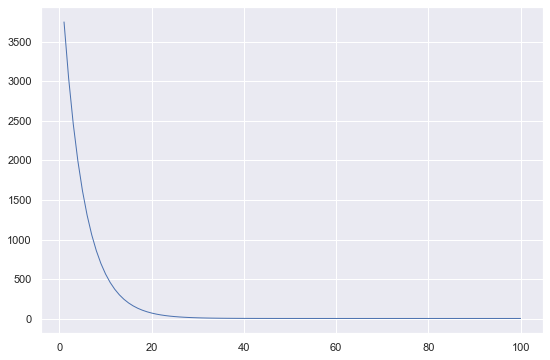

In [119]:
plt.plot(range(1, len(gd.mse_)+1), gd.mse_, linewidth=1);

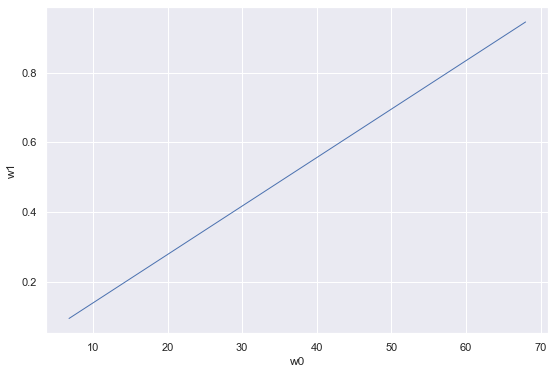

In [120]:
plt.plot(np.array(gd.weights_).T.tolist()[0], np.array(gd.weights_).T.tolist()[1], linewidth=1)
plt.xlabel('w0')
plt.ylabel('w1');

In [86]:
%%time
gd = GDRegressor_mode(quiet=True, n_iter=1, eta=1)
gd.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, gd.predict(X_valid_scaled))

Wall time: 163 ms


2.670830767667632

In [87]:
%%time
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
mean_squared_error(y_valid, lr.predict(X_valid_scaled))

Wall time: 2 ms


2.670830767667635